In [1]:
from IPython.display import HTML
from IPython.display import Image

# Python Workshop

Arun Prasaad Gunasekaran

Assistance from : ChetanKumar Jalihal, Aditya Nalam, Arijit Chanda

Centre for Atmospherice and Oceanic Sciences,

Indian Institute of Science

17 August 2015 to 21 August 2015

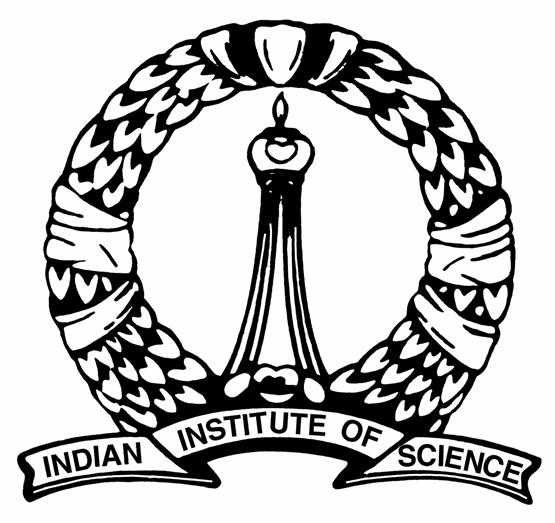

In [2]:
Image(filename='IISc_logo.jpg',width=200,height=200) 

# Session 3

# Introducing Maps
---

This is possible using Basemap module. This also helps in making projection plots.

The below example is taken from :http://matplotlib.org/basemap/users/examples.html

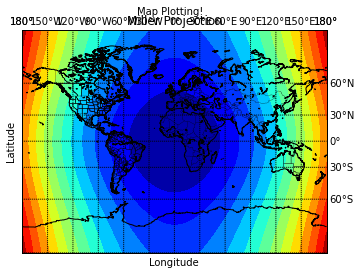

In [40]:
% matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

# set up Miller map projection
# For mercator projection, do not push latitudes beyond +/- 80
# llcrnr = lower left corner
# urcrnr = upper right corner
# l = lower resolution, c = coarse

# longitude limits. For setting Limits and Centering
l1 = -180
l2 = 180

# latitude limits. For setting Limits only; No Centering
r1 = -90
r2 = 90

map = Basemap(projection='mill', llcrnrlat=r1,urcrnrlat=r2,\
            llcrnrlon=l1,urcrnrlon=l2, resolution='l')

# draw coastlines, country boundaries, fill continents, draw states.
map.drawcoastlines(linewidth=1.0)
map.drawcountries(linewidth=0.25)
#map.fillcontinents(color='coral',lake_color='aqua')
map.drawstates()

# draw the edge of the map projection region (the projection limb)
map.drawmapboundary()
# draw lat/lon grid lines every 30 degrees.

map.drawmeridians(np.arange(-180,180,30),labels=[0,0,1,0])
map.drawparallels(np.arange(-90,90,30),labels=[0,1,0,0])
# Grid lines. Meridians are vertical lines
# Parallels are horizontal lines
# Label notations = left, right, top, bottom

nlats = 73
nlons = 145
lats = np.linspace(r1, r2, nlats)
lons = np.linspace(l1, l2, nlons)
# Position longitudes accordingly for centering in the map!

lon, lat = np.meshgrid(lons, lats) # lon-lat grids!

x, y = map(lon, lat) # x-y map grid in meters!

z = lon**2 + lat**2 # some data to plot!

#plt.contourf(lon, lat, z, 15) 
# This won't work because you do not have map objects for axis
plt.contourf(x, y, z, 15)
# This works
#plt.grid()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.suptitle("Map Plotting!")
plt.title('Miller Projection')
#print x
# This works because x and y are map objects

You have features to adjust the title, labels etc., without interference!

# Playing with Matrices
---

We can do Solve a system of simultaneous equations by using the linear algebra solver in Numpy module.

eg: 

$5x_1 + 6x_2 + 2x_3 + 3x_4 + 3x_5 = 19$

$8x_1 + 9x_2 + 8x_3 + 8x_4 + -45x_5 = -12$

$8x_1 + 2x_2 + 8x_3 + 6x_4 + 5x_5 = 29$

$4x_1 + 1x_2 - 12x_3 + 1x_4 + 2x_5 = -4$

$8x_1 + 2x_2 - 4x_3 + -5x_4 + 5x_5 = 6$

After this, let's calculate the inverse, eigen values, eigen vectors, determinant etc.,

In [146]:
import numpy as np

A = np.array([[5., 6, 2, 3, 3],[8, 9, 8, 8, -45],[8, 2, 8, 6, 5],[4, 1, -12, 1, 2],[8, 2, -4, -5, 5]])
# Input Matrix or Co-efficient Matrix
b = np.array((19, -12, 29., -4, 6))
# RHS matrix
x = np.linalg.solve(A, b)
# Solution
# np.linalg.lstsq(a,b) if A is rectangular
print "The solution is: ", x

print np.allclose(np.dot(A, x), b) # This does matrix multiplication
# Checks whether the solution x when multiplied with A equals b

The solution is:  [ 1.  1.  1.  1.  1.]
True


In [147]:
print np.linalg.inv(A) # Calculates the Inverse of A

print np.linalg.pinv(A) # Calculates the pseudo inverse of A

[[ -7.09840529e-02   1.24534645e-02   7.44985275e-02   2.23995666e-02
    7.12132578e-02]
 [  2.10812913e-01  -1.94476857e-04  -1.06573318e-01  -3.32555426e-02
   -8.36250486e-03]
 [ -1.06962271e-03   7.25815414e-04   2.27468467e-02  -7.23141357e-02
    1.33529199e-02]
 [  1.16686114e-03  -7.91798633e-04   6.60943491e-02   7.88881480e-02
   -1.05475913e-01]
 [  2.95604823e-02  -2.00588987e-02   7.72350947e-03  -1.50025004e-03
   -5.38978719e-03]]
[[ -7.09840529e-02   1.24534645e-02   7.44985275e-02   2.23995666e-02
    7.12132578e-02]
 [  2.10812913e-01  -1.94476857e-04  -1.06573318e-01  -3.32555426e-02
   -8.36250486e-03]
 [ -1.06962271e-03   7.25815414e-04   2.27468467e-02  -7.23141357e-02
    1.33529199e-02]
 [  1.16686114e-03  -7.91798633e-04   6.60943491e-02   7.88881480e-02
   -1.05475913e-01]
 [  2.95604823e-02  -2.00588987e-02   7.72350947e-03  -1.50025004e-03
   -5.38978719e-03]]


In [148]:
EigVal, EigVec = np.linalg.eig(A) # Gives the Eigen values and Eigen Vectors of A

print "The Eigen Values are : ",EigVal

for i in range(0, 5):
    print "The Eigen Vector {} is : ".format(i), EigVec[:,i]
    
print "The Determinant is :", np.linalg.det(A)

The Eigen Values are :  [ -7.37102856 +0.j          13.73783413 +7.74629984j
  13.73783413 -7.74629984j   3.94768015+11.89424798j
   3.94768015-11.89424798j]
The Eigen Vector 0 is :  [ 0.49201449+0.j -0.82873391+0.j -0.02542154+0.j -0.11542826+0.j
 -0.23906465+0.j]
The Eigen Vector 1 is :  [ 0.24316923-0.32974889j  0.64230668+0.j          0.08457836-0.52048385j
  0.19363778+0.23447995j  0.02506534-0.22003383j]
The Eigen Vector 2 is :  [ 0.24316923+0.32974889j  0.64230668-0.j          0.08457836+0.52048385j
  0.19363778-0.23447995j  0.02506534+0.22003383j]
The Eigen Vector 3 is :  [ 0.14007002+0.18839566j -0.67298072+0.j          0.35217748-0.25513474j
  0.25739106+0.41886759j  0.05771099+0.24048061j]
The Eigen Vector 4 is :  [ 0.14007002-0.18839566j -0.67298072-0.j          0.35217748+0.25513474j
  0.25739106-0.41886759j  0.05771099-0.24048061j]
The Determinant is : -287952.0


To enable Matrix multiplication, use
```python
np.matrix(array)
np.mat(a1) * np.mat(a2)
np.dot(mat1,mat2)

# Arrays:
# * and np.multiply(A1, A2) for element-wise multiplication
# np.dot(A1, A2) for matrix multiplication

# Matrices:
# * and np.dot(M1, M2) for matrix multiplication
# np.multiply(M1, M2) for element-wise multiplication
```
    For arrays, * means element wise multiplication. Use np.dot() for matrix multiplication.
    For matrix, * means matrix multiplication.

# Integration in Python
---
This can be done by using numerical quadrature. You have several functions available for calculating integrals

The integral is : 12.0
The error is : 1.33226762955e-13


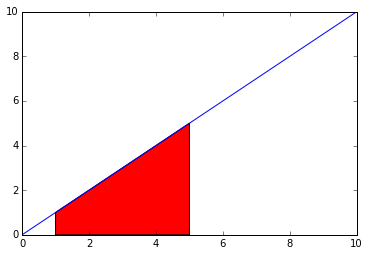

In [41]:
import numpy as np
from scipy.optimize.minpack import fsolve
from scipy.integrate.quadpack import quad
import matplotlib.pyplot as plt

b = 5.0

# Function which is to be integrated
def func(x):
    return np.array(x) 

x = np.linspace(0, 10, 201)
integral, err = quad(func, 1, 5)
# Numerical quadrature that calculates the integral and error

print "The integral is :", integral
print "The error is :", err

section = np.linspace(1, 5, 20)

plt.plot(x, func(x))
plt.fill_between(section, func(section), facecolor='red')

## Another Example!
---

$E_{\lambda}(\lambda, T) = \frac{2\pi\ hc^2}{\lambda^5}\frac{1.0}{\exp{\left[\frac{hc}{\lambda k_BT}\right]}-1} Wm^{-2}K^{-1}\mu m^{-1}$

The total Energy flux is : 62851389.0924
The Energy flux in the band is : 29217865.3701
The Energy flux Fraction is: 0.464872229429
The error is : 3.24383468643e-07


/home/arun/anaconda3/envs/py27env/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: divide by zero encountered in divide
/home/arun/anaconda3/envs/py27env/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: invalid value encountered in divide


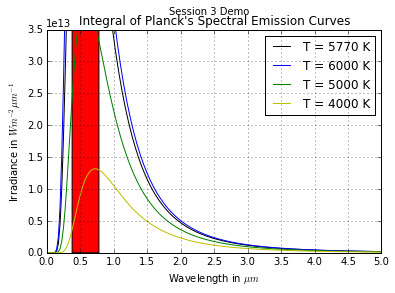

In [42]:
from scipy.constants import codata

# get physical from module:
D = codata.physical_constants

s = D['Stefan-Boltzmann constant'][0]

def spectra(l,T):
    h = D['Planck constant'][0]
    k = D['Boltzmann constant'][0]
    c = D['speed of light in vacuum'][0]
    func = ((2.0*h*np.pi*c**2)/(l**5))/(np.exp(h*c/(l*k*T)) - 1.0)
    return func

T1 = 5770.0
T2 = 6000.0
T3 = 5000.0
T4 = 4000.0

int1,err1 = quad(spectra, 0.38e-6, 0.78e-6, args=(T1))

E1 = s*T1**4

l = np.linspace(0, 5e-6, 201)

s1 = spectra(l, T1)
s2 = spectra(l, T2)
s3 = spectra(l, T3)
s4 = spectra(l, T4)

print "The total Energy flux is :", E1
print "The Energy flux in the band is :", int1
print "The Energy flux Fraction is:", int1/E1
print "The error is :", err1

section = np.linspace(0.38e-6, 0.78e-6, 20)

plt.plot(l*1e6, s1, 'k', label='T = 5770 K')
plt.plot(l*1e6, s2, 'b', label='T = 6000 K')
plt.plot(l*1e6, s3, 'g', label='T = 5000 K')
plt.plot(l*1e6, s4, 'y', label='T = 4000 K')
plt.fill_between(section*1e6, func(spectra(section, T2)), facecolor='red')
plt.legend()
plt.grid('on')
plt.axis([0.0, 5.0, 0.0e13, 3.5e13])
plt.xticks(np.linspace(0.0, 5.0, 11))
plt.yticks(np.linspace(0.0e13, 3.5e13, 8))
plt.xlabel('Wavelength in $\mu m$')
plt.ylabel('Irradiance in $Wm^{-2}\mu m^{-1}$')
plt.suptitle('Session 3 Demo')
plt.title("Integral of Planck's Spectral Emission Curves")
plt.savefig('Spectra.png', format='png', dpi=400)

# Differentiation in Python
---
This is rather straight forward

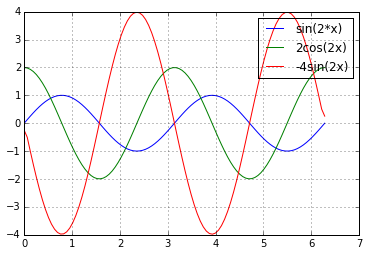

In [178]:
x = np.linspace(0, 2.0*np.pi, 100)
y = np.sin(2*x)
y1 = np.gradient(y, x[1]-x[0]) # Calculates the Differential
y2 = np.gradient(y1, x[1]-x[0])

plt.plot(x, y, label='sin(2*x)')
plt.plot(x, y1, label='2cos(2x)')
plt.plot(x, y2, label='-4sin(2x)')
plt.legend()
plt.grid()
plt.savefig('Differentiation.png', format='png', dpi=400)

# Symbolic Operations in Python
---

This is done using sympy module. (Symbolic Python Module)

You can do:

* Symbolic Integration
* Symbolic Differentiation
* Symbolic Transformations
* Solve functions and equations

In [190]:
import sympy as sym

x = sym.Symbol('x')
sym.integrate(x**2 + 2*x + 1)

x**3/3 + x**2 + x

In [192]:
x = sym.Symbol('x')
sym.integrate(x**2 + sym.sin(x))

x**3/3 - cos(x)

In [191]:
l = sym.Symbol('l')
T = sym.Symbol('T')
sym.integrate(sym.sin(2*sym.pi*l/T), l)

Piecewise((0, 2*pi/T == 0), (-T*cos(2*pi*l/T)/(2*pi), True))

In [193]:
x = sym.Symbol('x')
sym.diff(x**2 + sym.sin(x))

2*x + cos(x)

In [194]:
l = sym.Symbol('l')
T = sym.Symbol('T')
sym.diff(sym.sin(2*sym.pi*l/T), l)

2*pi*cos(2*pi*l/T)/T

In [198]:
from sympy.integrals import laplace_transform as lt
from sympy.abc import t, s
lt(t**2 + 2*t + 1, t, s)

((s**2 + 2*s + 2)/s**3, 0, True)

In [199]:
from sympy.integrals import inverse_laplace_transform as ilt
ilt((s**2 + 2*s + 2)/s**3, s, t)

(t**2 + 2*t + 1)*Heaviside(t)

In [201]:
y = sym.Symbol('y')
sym.expand((x+y)**3)

x**3 + 3*x**2*y + 3*x*y**2 + y**3

In [202]:
sym.solve(x**4 - 1, x)

[-1, 1, -I, I]

In [203]:
f = x**4 - 3*x**2 + 1
sym.factor(f)

(x**2 - x - 1)*(x**2 + x - 1)

# Solving an ODE:
---

Scipy library has quite a lot of functions to do it.

For Example, Let's see how a mass-spring-damper system is solved!

$ m\ddot{x} + c\dot{x} + kx = F_0\sin{\omega t}$

$x(t = 0) = 0$ and $\dot{x}(t = 0) = 0$

$ \ddot{x} = \left[\frac{F_0\sin{\omega t}}{m} - \frac{c\dot{x}}{m} - \frac{kx}{m} \right]$

We need:

    * A function that represents the equation and derivatives
    * odeint function from scipy
    * Initial conditions

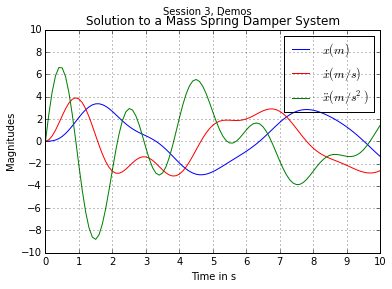

In [150]:
% matplotlib inline
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dampfunc(x, t):
    F0 = 50.0
    omg = 1.0
    m = 2.0
    c = 1.0
    k = 20
    x0 = x[0] # Displacement
    x1 = x[1] # Velocity
    x2 = F0*np.sin(omg*t)/m - c*x1/m - k*x0/m # Acceleration
    return x1, x2

F0 = 50.0
omg = 1.0
m = 2.0
c = 1.0
k = 20

init = [0.0, 0.0] # Initial conditions
t = np.linspace(0.0, 10.0, 101)

x = odeint(dampfunc, init, t) # This is the vital part!

mass = x

acc = F0*np.sin(omg*t)/m - c*x[:,1]/m - k*x[:,0]/m

plt.plot(t, x[:,0], 'b', label='$x (m)$')
plt.plot(t, x[:,1], 'r', label='$\dot{x} (m/s)$')
plt.plot(t, acc, 'g', label='$\ddot{x} (m/s^2)$')
plt.axis([0, 10, -10, 10])
plt.xticks(np.linspace(0,10,11))
plt.yticks(np.linspace(-10,10,11))
plt.grid('on')
plt.legend()
plt.title('Solution to a Mass Spring Damper System')
plt.suptitle('Session 3, Demos')
plt.xlabel('Time in s')
plt.ylabel('Magnitudes')
plt.savefig('Mass_Spring_Damper.jpg', format='jpg', dpi=200)

# Solution to Lorentz Equation
---

$ \dot{x} = \sigma(y-x)$

$ \dot{y} = (\rho - z)x - y$

$ \dot{z} = xy - \beta z$

where:
$\sigma = 10$
$\rho = 28$
$\beta = \frac{8}{3}$

Initial Conditions: $x(t = 0) = y(t = 0) = z(t = 0) = 1.0$

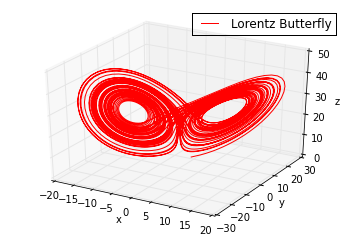

In [49]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def lorentz(st, t):
    s = 10.0
    p = 28.0
    b = 8.0/3.0
    
    x0 = st[0] # x displacement
    y0 = st[1] # y displacement
    z0 = st[2] # z displacement
    
    xd = s*(y0-x0)
    yd = (p-z0)*x0 - y0
    zd = x0*y0 - b*z0
    
    return xd, yd, zd

init = [2.0, 3.0, 4.0]
t = np.arange(0.0, 60.0, 0.01)

st = odeint(lorentz, init, t)

lor = st

x = st[:,0]
y = st[:,1]
z = st[:,2]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(x, y, z, 'r', label='Lorentz Butterfly')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.savefig('Lorentz_Butterfly.png', format='png', dpi=400)

# FFT and IFFT
---

This is possible using numpy and scipy modules

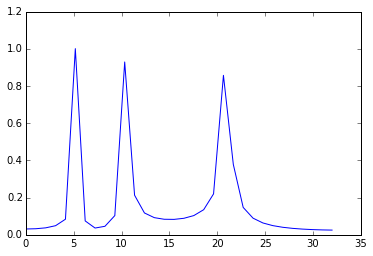

In [220]:
from scipy.fftpack import fft, ifft
# This is necessary!

N = 64 # Number of points
T = 1/64.0 # Spacing between points
# if T is time/distance, 1/T is frequency/wavenumber

x = np.linspace(0, 2*np.pi*N*T, N)
y1 = np.cos(20*x)
y2 = np.sin(10*x)
y3 = np.sin(5*x)

y = y1 + y2 + y3 # Produces a random signal

fy = fft(y) # Finds the FFT
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

plt.plot(xf, (2.0/N)*np.abs(fy[0:N/2])) 
# Only half is valid. The other half is replica!

See the Super Imposition?


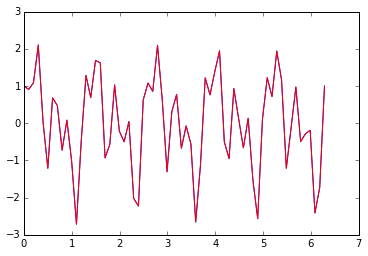

In [221]:
y4 = ifft(fy) # Gets the inverse FFT
plt.plot(x, y4, 'b')
plt.plot(x, y, 'r')
print "See the Super Imposition?"

# Basic Statistical Operations
---

This is possible using numpy and scipy modules.

In [227]:
x = np.linspace(0, 2.0*np.pi, 101)
y = 1.0 + np.sin(x)
y1 = 1.0 + np.cos(x)

m1 = np.mean(y)
sd1 = np.std(y)
var1 = np.var(y)

print m, sd, var

cov1 = np.cov(y)
cov2 = np.cov(y1)
cov3 = np.cov(y, y1)

print cov1, cov2
print cov3


1.0 0.70359754473 0.49504950495
0.5 0.509900990099
[[  5.00000000e-01   4.39348777e-18]
 [  4.39348777e-18   5.09900990e-01]]


# Next Session
---

* Working with Ipython notebooks
* Making Presentation and Documentation with Ipython Notebooks
* Demo of f2py - Invoking Fortran files in Python
* Optional - Cython
* Take away message!